## Calculating the Return of Indices

Consider three famous American market indices – Dow Jones, S&P 500, and the Nasdaq for the period of 1st of January 2000 until today.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [2]:
tickers = ['^DJI', '^GSPC', '^IXIC']
market_indices = pd.DataFrame()

for t in tickers:
    market_indices[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
print(market_indices.info())
display(market_indices.head())
display(market_indices.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5091 entries, 2000-01-03 to 2020-03-27
Data columns (total 3 columns):
^DJI     5091 non-null float64
^GSPC    5091 non-null float64
^IXIC    5091 non-null float64
dtypes: float64(3)
memory usage: 159.1 KB
None


,^DJI,^GSPC,^IXIC
Date,,,
2000-01-03,11357.509766,1455.219971,4131.149902
2000-01-04,10997.929688,1399.420044,3901.689941
2000-01-05,11122.650391,1402.109985,3877.540039
2000-01-06,11253.259766,1403.449951,3727.129883
2000-01-07,11522.559570,1441.469971,3882.620117


,^DJI,^GSPC,^IXIC
Date,,,
2020-03-23,18591.929688,2237.399902,6860.669922
2020-03-24,20704.910156,2447.330078,7417.859863
2020-03-25,21200.550781,2475.560059,7384.299805
2020-03-26,22552.169922,2630.070068,7797.540039
2020-03-27,21878.500000,2551.889893,7557.635742


Normalize the data to 100 and plot the results on a graph. 

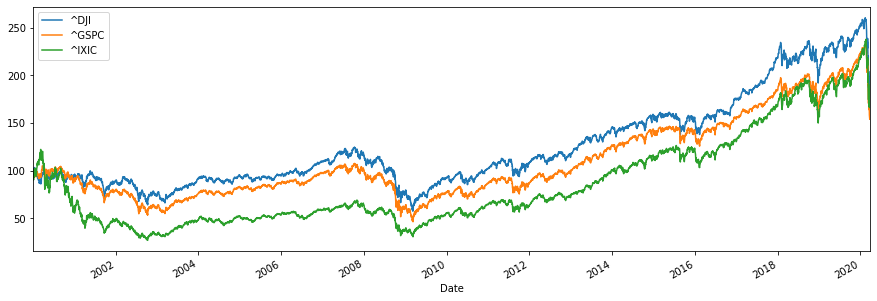

In [7]:
(market_indices / market_indices.iloc[0] * 100).plot(figsize=(15,5))
plt.show()

How would you explain the common and the different parts of the behavior of the three indices?

*****

Obtain the simple returns of the indices.

In [8]:
indices_returns = (market_indices / market_indices.shift(1)) - 1
indices_returns.tail()

,^DJI,^GSPC,^IXIC
Date,,,
2020-03-23,-0.030356,-0.029294,-0.002740
2020-03-24,0.113650,0.093828,0.081215
2020-03-25,0.023938,0.011535,-0.004524
2020-03-26,0.063754,0.062414,0.055962
2020-03-27,-0.029872,-0.029726,-0.030767


Estimate the average annual return of each index.

In [32]:
annual_indices_returns = indices_returns.mean() * 250
print('Average annual return of each index:')
for t in tickers:
    print('{}: {}%'.format(t, str(round(annual_indices_returns[t]*100,3))))


Average annual return of each index:
^DJI: 4.998%
^GSPC: 4.699%
^IXIC: 6.164%
